# Comparing the Value of Draft Picks in the NHL 
## (Low 1st Round Picks vs. High 2nd Round Picks)

#### Data Analysis by Minchan Han


## Approach:

  * This dataset will include drafts from 1992-93 season to the 2004-05 season (inclusive), as many players drafted from the 2005-06 draft and onwards are still active, meaning their GP (Games Played) is still increasing

#### The drafts will then include at least 26 teams, (Florida and Anaheim were introduced as the 25th and 26th teams for the start of the 1993-94 season), meaning the 1992-93 draft is the best place to start, as we try to mimic the modern draft (with 31 teams) and collect enough data to train our model (the next franchise being introduced in 1998).

##### Note: Drafts occur at the end of the season, so the 1992-93 draft was held in 1993, meaning our first draft is the 1993 draft

#### We will export data from Hockey-Reference.com in this fashion:
  * **OUR MAIN DATA:** The 16th - 45th overall picks will be taken from each draft (15 from each round), the 16th-30th picks representing the low 1st Round Picks and the 31st - 45th picks representing the high 2nd Round Picks. 
  
  * The Round # that these overall picks belong to vary between 1993 and 2020 but, for example, even though the 1st Round only went to the the 26th pick in 1993, we will treat the 27th - 30th picks that year (and every year) as a modern day 1st Round Pick for simplicity
   
  * The Top 15 picks and 46th - 120th overall picks were also collected to compare them to our main 16th - 45th picks later on in our analysis

### NOTE: For this analysis unless otherwise stated, I will refer to the 16th - 30th picks (Last 15 picks of 1st Round) as "Low 1st Round Picks" and the 31st - 45th picks (First 15 picks of 2nd Round) as the "High 2nd Round Picks"

  * We will also assess a draft pick's value based on their Games Played (GP) because regardless of a player's playing stats, if they are playing on an NHL roster, it is because they have value, and we are measuring the value of the players chosen within the 15th - 45th overall picks
  
  * Goalies will be excluded from this study as they play in fewer games than skaters

## The questions we want to answer are:
### 1. How valuable are Low 1st Round Picks and High 2nd Round Picks relative to each other?
### 2. How valuable are these picks relative to the rest of the draft?
### 3. Is there any truth to the theory that beyond the very top picks of the draft, every draft pick is worth the same? Do they provide the same chance of producing a valuable player?

### We will analyze our data to try and answer our questions and at the end for fun, we will train a predictive model to try and predict which players drafted from 16th - 45th from the 2006-10 drafts will reach how many games played based on where they were drafted!

# Part 1 - Data Analysis
## Step 1: Import Libraries/Data

##### (Descriptions are the Draft Finder Filters on Hockey-Reference.com)
 * list93-05-top15.csv: http://hkref.com/tiny/cL2lg
 * list93-05-16to45.csv: http://hkref.com/tiny/2bsqE 
 * list93-05-46to120.csv: http://hkref.com/tiny/MnUQN
 * list06-10.csv: http://hkref.com/tiny/R99lE 

In [89]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import matplotlib.ticker as ticker
from IPython.display import display_html
from IPython.display import display, HTML

In [90]:
# Our main data, 16th to 45th Overall Picks
data = pd.read_csv("list93-05-16to45.csv")
# Now we have to remove all the Goalies from these files
data = data[data.Pos != "G"]

#### (33 Goalies have been removed between the 16th and 45th picks, there are 357 skaters remaining as you will see in the following displays)

## Step 2: Organize Data for Initial Analysis

In [91]:
# Let's take a quick look at this data now
display(data)
display(data.describe())

,Year,Round,Overall,Team,Player,Nat.,Pos,Age,To,Amateur Team,Amateur Lg.,NHL,GP,G,A,PTS,+/-,PIM
0,1993,1,16,Edmonton Oilers,Nick Stajduhar\stajdni01,CA,D,18.0,1996.0,London,OHL,x,2.0,0.0,0.0,0.0,2.0,4.0
3,1996,1,16,Tampa Bay Lightning,Mario Larocque\larocma01,CA,D,18.0,1999.0,Hull,QMJHL,x,5.0,0.0,0.0,0.0,-4.0,16.0
4,1997,1,16,Chicago Blackhawks,Ty Jones\jonesty01,US,RW,18.0,2004.0,Spokane,WHL,x,14.0,0.0,0.0,0.0,-1.0,19.0
5,1998,1,16,Montreal Canadiens,Eric Chouinard\chouier01,US,LW,18.0,2006.0,Quebec,QMJHL,x,90.0,11.0,11.0,22.0,-8.0,16.0
6,1999,1,16,Carolina Hurricanes,David Tanabe\tanabda01,US,D,19.0,2008.0,Wisconsin,WCHA,x,449.0,30.0,84.0,114.0,-47.0,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2001,2,45,Phoenix Coyotes,Martin Podlesak,CZ,C,18.0,NaN,Lethbridge,WHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,2002,2,45,Montreal Canadiens,Tomas Linhart,CZ,D,18.0,NaN,Pardubice Jr.,Czech-Jr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,2003,2,45,Boston Bruins,Patrice Bergeron\bergepa01,CA,C,18.0,2020.0,Acadie-Bathurst,QMJHL,x,1089.0,352.0,517.0,869.0,201.0,424.0
388,2004,2,45,Chicago Blackhawks,Ryan Garlock,CA,C,18.0,NaN,Windsor,OHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Year,Round,Overall,Age,To,GP,G,A,PTS,+/-,PIM
count,357.000000,357.000000,357.000000,314.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,1998.971989,1.565826,30.462185,18.210191,2009.361404,365.589474,52.915789,90.891228,143.807018,-1.045614,273.722807
std,3.712914,0.496344,8.671395,0.559916,6.212713,359.495191,82.945977,132.304142,210.354483,36.493411,329.747124
min,1993.000000,1.000000,16.000000,18.000000,1994.000000,1.000000,0.000000,0.000000,0.000000,-108.000000,0.000000
25%,1996.000000,1.000000,23.000000,18.000000,2004.000000,46.000000,1.000000,3.000000,6.000000,-16.000000,22.000000
50%,1999.000000,2.000000,31.000000,18.000000,2009.000000,245.000000,16.000000,31.000000,51.000000,-3.000000,137.000000
75%,2002.000000,2.000000,38.000000,18.000000,2014.000000,615.000000,66.000000,123.000000,188.000000,3.000000,407.000000
max,2005.000000,2.000000,45.000000,23.000000,2020.000000,1516.000000,386.000000,691.000000,965.000000,201.000000,1732.000000


#### Columns:

  * Year = Drafted Year
  * Round = Drafted Round Number (1 - 30 is 1st round, 31 - 60 is 2nd round. In our data, we are of course, ommitting the top half of the 1st round and bottom half of the 2nd round)
  * Overall = The Order a Player has been drafted in the entire draft, regardless of Round #
  * Age = Player's Draft Age 
  * To = Final Year a Player has played (NaN if they haven't played a game, 2020 if they are still playing currently)
  * GP = Games Played
  * G = Goals
  * A = Assists
  * PTS = Points (G + A)
  * PIM = Penalties in Minutes

#### **(Unnamed Column on left-most column is the index)**
###### +/- will be excluded

#### We notice many columns we want to remove from our data. We can also see that all the missing values (NaN) in our data can be replaced with a 0. For example GP shouldn't be NaN if a player has no data under GP, it should be 0.
#### The columns we want for now are Year, Round, Overall, To, Age, GP, G, A, PTS, +/-, PIM. 

  * The Year column is for temporary organization
  * We need Round, and Overall for obvious reasons, we are trying to analyze the value of the draft pick # and the Round #
  * The To column is for if they are retired, still playing, or haven't played a game
  * We are going to look at the rest of the playing stats to see if there are any other correlations we can see between the playing stats and longevity


### Organize Columns

In [92]:
# First lets restrict our data to the columns we need
columns = ["Year", "Round", "Overall", "To", "Age", "GP", "G", "A", "PTS", "+/-", "PIM"]
data = data[columns]

# Now since all of these features are numbers or NaN, we can turn every NaN into 0.0
# Note: this will turn the NaN of "To" to 0, luckily the value doesn't matter as we will just use the "To" column to create a new column called "Status" soon
data = data.fillna(0, downcast="infer")

# Let's change the Ages not recorded by Hockey-Reference which were turned from NaN to 0 to the most common draft pick age, which is 18 for simplicity
print("Before converting Age 0 -> 18: ")
display(data.groupby("Age").size()) # Display Age Count
data.loc[data.Age == 0, "Age"] = 18 # Convert

Before converting Age 0 -> 18: 


Age
0      43
18    262
19     43
20      7
22      1
23      1
dtype: int64

### We will also create a new column called "Status" for if they haven't debuted (0), are still playing (1), or have retired (2).

In [93]:
def assignStatus(row):
    if row.To == 0: # Haven't Debuted
        return 0
    elif row.To == 2020: # Still Playing
        return 1
    else:   # Retired
        return 2

data["Status"] = data.apply(lambda row: assignStatus(row), axis = 1)
display(data.head(3))

statusseries = data.groupby("Status").size()
statusseries.name = "Count"
statusdf = statusseries.to_frame()
statusdf.reset_index(inplace=True)

status_styler = statusdf.style.set_table_attributes("style='display:inline'")

print("\n\nNumber of players by Status: ")
display_html(status_styler.render())


,Year,Round,Overall,To,Age,GP,G,A,PTS,+/-,PIM,Status
0,1993,1,16,1996,18,2,0,0,0,2,4,2
3,1996,1,16,1999,18,5,0,0,0,-4,16,2
4,1997,1,16,2004,18,14,0,0,0,-1,19,2




Number of players by Status: 


#### It looks like we have 19 players that are still playing in 2020 (Status = 1), but it shouldn't affect our analysis because the players are nearing the end of their long careers and it is unlikely that in 15 years of playing, they have not already reached 750 games

#### In fact we can see that every single one of the 19 players but one has reached 750 games, and that player is at 739 GP

In [94]:
display(data[data["Status"] == 1])

,Year,Round,Overall,To,Age,GP,G,A,PTS,+/-,PIM,Status
23,2003,1,17,2020,19,1015,386,406,792,71,378,1
49,2003,1,19,2020,18,1053,274,691,965,130,888,1
62,2003,1,20,2020,18,1113,210,484,694,-7,685,1
63,2004,1,20,2020,19,991,195,337,532,-19,338,1
113,2002,1,24,2020,18,1018,245,377,622,42,454,1
116,2005,1,24,2020,18,803,238,329,567,126,402,1
129,2005,1,25,2020,18,1012,165,234,399,40,345,1
140,2003,1,26,2020,18,805,130,101,231,-48,588,1
157,2000,1,28,2020,18,1264,320,477,797,110,766,1
160,2003,1,28,2020,18,1045,377,420,797,74,1180,1


### And finally, as mentioned before, we will treat all 27, 28, 29, and 30th picks as first rounders
##### (1st Round = 1-30 | 2nd Round = 31-60)

In [95]:
def assignAdjustedRound(row):
    if row.Overall <= 30:
        return 1
    elif row.Overall <= 60:
        return 2
    elif row.Overall <= 90:
        return 3
    else:
        return 4

data["AdjRound"] = data.apply(lambda row: assignAdjustedRound(row), axis = 1)
column_order = ["Year", "AdjRound", "Overall", "To", "Age", "GP", "G", "A", "PTS", "+/-", "PIM", "Status"]
data = data.reindex(columns=column_order)
print("\nNew AdjRound Column: ")
display(data.loc[(data["Overall"] >= 27) & (data["Overall"] <= 30)].head(3)) 
display(data.loc[(data["Overall"] >= 27) & (data["Overall"] <= 30)].tail(3)) 
# Fun Fact: 17 Goalies were drafted in our Adjusted 1st Round and 16 were drafted in our Adjusted 2nd Round! As even as it gets, wow!


New AdjRound Column: 


,Year,AdjRound,Overall,To,Age,GP,G,A,PTS,+/-,PIM,Status
143,1998,1,27,2016,18,1079,181,575,756,-1,655,2
144,1999,1,27,0,18,0,0,0,0,0,0,0
145,2000,1,27,2004,18,14,0,1,1,-2,2,2


,Year,AdjRound,Overall,To,Age,GP,G,A,PTS,+/-,PIM,Status
191,1996,1,30,2012,18,341,36,40,76,-16,206,2
193,1998,1,30,2004,18,11,0,1,1,-3,9,2
194,1999,1,30,2002,18,1,0,0,0,0,2,2


## Step 3: Observe Data
### Before we observe our main data, we will import our other data (Top 15 picks and 46th - 120th picks)


In [96]:
datatop = pd.read_csv("list93-05-top15.csv") # Top 15 Overall
datalow = pd.read_csv("list93-05-46to120.csv") # Low Picks: 46th to 120th
datatop = datatop[datatop.Pos != "G"]
datalow = datalow[datalow.Pos != "G"]
datatop = datatop[columns]
datalow = datalow[columns]
datatop = datatop.fillna(0, downcast="infer")
datalow = datalow.fillna(0, downcast="infer")
datatop.loc[datatop.Age == 0, "Age"] = datalow.loc[datalow.Age == 0, "Age"] = 18
datatop["Status"] = datatop.apply(lambda row: assignStatus(row), axis = 1)
datalow["Status"] = datalow.apply(lambda row: assignStatus(row), axis = 1)
datatop["AdjRound"] = datatop.apply(lambda row: assignAdjustedRound(row), axis = 1)
datalow["AdjRound"] = datalow.apply(lambda row: assignAdjustedRound(row), axis = 1)
datatop = datatop.reindex(columns=column_order)
datalow = datalow.reindex(columns=column_order)

completedata = pd.concat([datatop, data, datalow], ignore_index=True, keys=["datatop", "data", "datalow"]) # Combine all data
display(completedata)

,Year,AdjRound,Overall,To,Age,GP,G,A,PTS,+/-,PIM,Status
0,1993,1,1,2006,18,616,129,198,327,-176,186,2
1,1994,1,1,2014,18,1128,137,363,500,-86,1491,2
2,1995,1,1,2008,18,619,76,247,323,-98,500,2
3,1996,1,1,2015,18,1179,71,217,288,68,756,2
4,1997,1,1,2020,18,1636,420,1089,1509,186,1248,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1994,4,120,0,18,0,0,0,0,0,0,0
1453,1995,4,120,0,18,0,0,0,0,0,0,0
1454,1996,4,120,0,18,0,0,0,0,0,0,0
1455,1997,4,120,0,18,0,0,0,0,0,0,0


### Now let's try to answer our first question. Are the high 2nd Round Picks just as valuable as the low 1st Round Picks?


Mean GP in Low 1st Round: 373.9157303370786
Mean GP in High 2nd Round: 210.25698324022346


Each point in our graph represents the average GP by all the players drafted at that pick # through 1993-2005


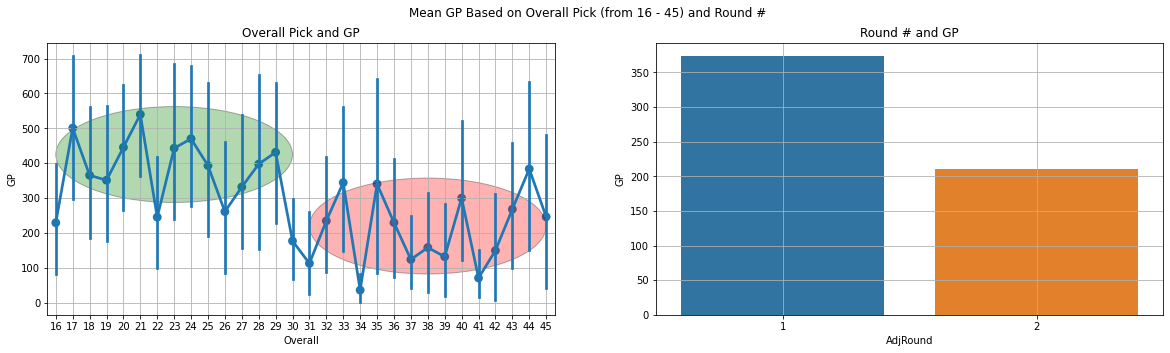

In [97]:
# Since the main thing we are focusing on is the correlation between Overall draft pick #, Round # (AdjRound) and GP, we will try to graph some data using those values

gpround1 = (data.loc[data["AdjRound"] == 1])["GP"].mean()
gpround2 = (data.loc[data["AdjRound"] == 2])["GP"].mean()
print("\nMean GP in Low 1st Round: " + str(gpround1))
print("Mean GP in High 2nd Round: " + str(gpround2) + "\n")

print("\nEach point in our graph represents the average GP by all the players drafted at that pick # through 1993-2005")
fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].set_title("Overall Pick and GP")
axs[1].set_title("Round # and GP")
axs[0].add_patch(patches.Ellipse((7, 425), 14, 275, alpha=0.3, facecolor="green", edgecolor="black", linewidth=1, linestyle='solid'))
axs[0].add_patch(patches.Ellipse((22, 220), 14, 275, alpha=0.3, facecolor="red", edgecolor="black", linewidth=1, linestyle='solid' ))

fig.suptitle("Mean GP Based on Overall Pick (from 16 - 45) and Round #")
sns.pointplot(x="Overall", y="GP", data=data, ax=axs[0]).grid(True)
sns.barplot(x="AdjRound", y="GP", data=data, ax=axs[1], ci=None).grid(True)

#### Our graph shows an interesting result. It appears that the low 1st Round and high 2nd Round are separated into two clusters (w/ outliers), with the low 1st Round Picks containing more average GP than the high 2nd Round Picks by a large margin. The mean GP for the low 1st round is 374, while the mean for the high 2nd round is 210!

#### It's also interesting that instead of a gradual decrease of GP as the overall pick numbers increase in each round, the points seem to be scattered randomly between the 16th and 30th picks. The same result is shown with the 31st to 45th picks. Do these clusters show us an answer to our 1st question? Are low 1st Round Picks that much more valuable than high 2nd Round Picks as a whole?

#### Let's continue by comparing our data with the rest of the draft, and if the low 1st Round and high 2nd Round follow this unique separation pattern then we can answer yes, the low 1st Round is definitely more valuable than the high 2nd Round.

### Let's compare our main data with the first 120 picks from each draft
#### Before we do so, we keep in mind that every pick between 16 and 30 have produced similar value to each other. The picks between 31 and 45 also appear to follow the same randomized pattern within their respective range.

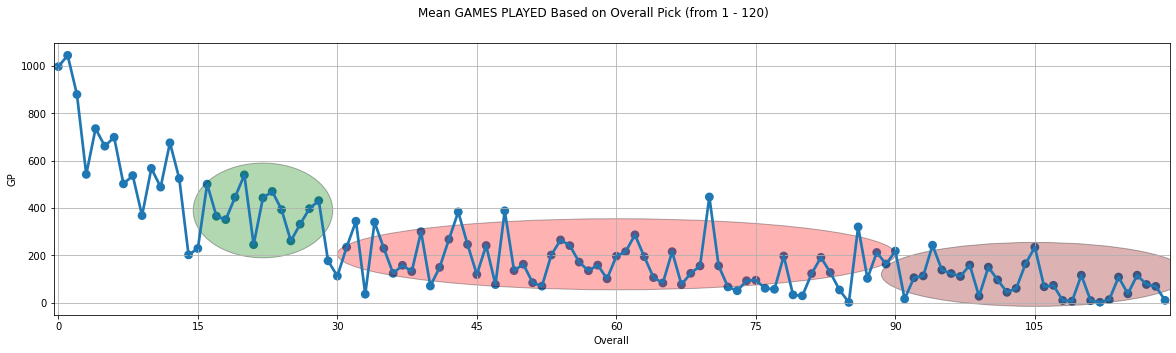

In [98]:
fig, axs = plt.subplots(1, 1, figsize=(20,5))

fig.suptitle("Mean GAMES PLAYED Based on Overall Pick (from 1 - 120)")
sns.pointplot(x="Overall", y="GP", data=completedata, ax=axs, ci=None).grid(True)
axs.add_patch(patches.Ellipse((22, 390), 15, 400, alpha=0.3, facecolor="green", edgecolor="black", linewidth=1,linestyle='solid'))
axs.add_patch(patches.Ellipse((60, 205), 60, 300, alpha=0.3, facecolor="red", edgecolor="black", linewidth=1,linestyle='solid'))
axs.add_patch(patches.Ellipse((105, 120), 33, 270, alpha=0.3, facecolor="darkred", edgecolor="black", linewidth=1,linestyle='solid'))
axs.xaxis.set_major_locator(ticker.MultipleLocator(15))
axs.xaxis.set_major_formatter(ticker.ScalarFormatter())



#### We can observe that our usual Low 1st Round are picks being randomly clustered together, with the same drop off into the High 2nd Round. However, we can see that all the picks 45+ are very similar as well, creating its own cluster combining with the High 2nd Round picks! (With another drop off in value at the ~100th pick)

#### We can also see that the top 15 picks are clearly on a class of their own. 

#### We can deduce from this graph that:
  1. The Top 15 picks are exponentially higher in value than the rest of the draft, and the order appears to matter amongst these picks, creating a gradual decrease as the picks incerase
  2. The Low 1st Round Picks (16-30) are on a slightly higher tier from the rest of the draft, answering our first question. Yes! Just like how the top 15 picks are more valuable than the low 1st Round, the low 1st Round is also more valuable than the rest of the draft (but to a lesser extent).

#### It appears that the draft is somewhat split into 
  * Tier 1: Top 15, over 400 GP
  * Tier 2: Low 1st Round, half of the picks play over 400 GP
  * Tier 3: Reaching 400 GP is an outlier


### We will now attempt to answer our second question, how do the low 1st Round and high 2nd Round compare to the rest of the draft? 
#### Well we have some answers already based on our previous graphs. The Top 15 picks are on a tier above the low 1st and high 2nd Round Picks. 
#### Let's complete our answer with the tables below:

Players with minimum 250 GP: 

1st - 15th: 130
16th - 30th: 95
31st - 45th: 47
46th - 60th: 39
61st - 75th: 39
76st - 90th: 32
91st - 105th: 28
106th - 120th: 18


Players with minimum 500 GP: 

1st - 15th: 110
16th - 30th: 60
31st - 45th: 30
46th - 60th: 29
61st - 75th: 28
76st - 90th: 18
91st - 105th: 19
106th - 120th: 9


Players with minimum 750 GP: 

1st - 15th: 73
16th - 30th: 34
31st - 45th: 16
46th - 60th: 17
61st - 75th: 18
76st - 90th: 6
91st - 105th: 11
106th - 120th: 5


Players with minimum 1000 GP: 

1st - 15th: 42
16th - 30th: 15
31st - 45th: 9
46th - 60th: 6
61st - 75th: 3
76st - 90th: 2
91st - 105th: 3
106th - 120th: 1


Players with minimum 1250 GP: 

1st - 15th: 10
16th - 30th: 1
31st - 45th: 1
46th - 60th: 1
61st - 75th: 0
76st - 90th: 0
91st - 105th: 0
106th - 120th: 0



Text(0.5, 1.0, 'Minimum 1250 GP')

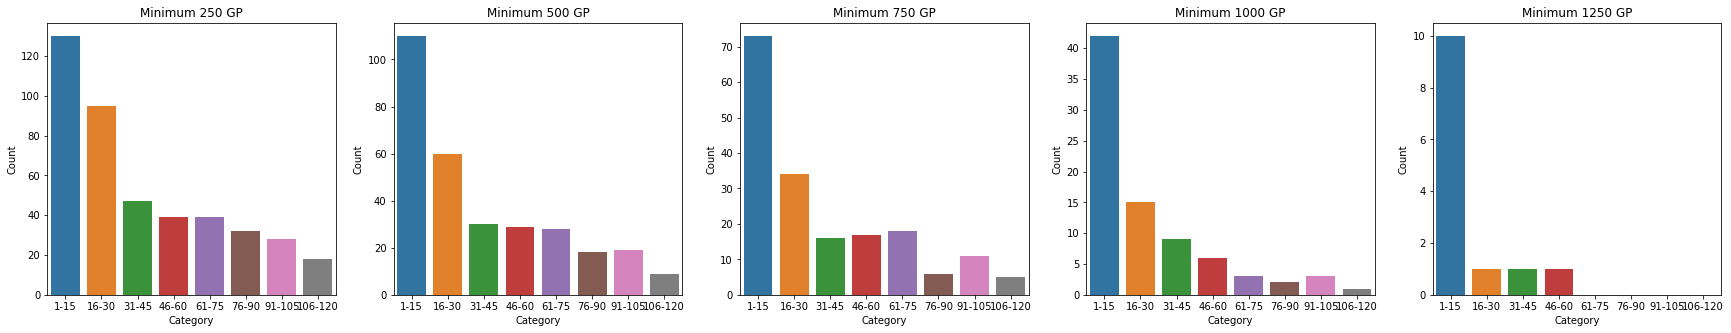

In [99]:
# We will take a look at our complete data from the 1st pick to 120th pick to see if there are similar trends
fig, axs = plt.subplots(ncols=5, figsize=(30,5))

# Players with at least 250 GP
top15 = completedata.loc[(completedata["Overall"]>= 1)&(completedata["Overall"]<= 15)&(completedata["GP"]>= 250)] # 1 - 15
lowfirst = data.loc[(data["AdjRound"] == 1) & (data["GP"] >= 250)] # 16 - 30
high2nd = data.loc[(data["AdjRound"] == 2) & (data["GP"] >= 250)] # 31 - 45
from46to60 = completedata.loc[(completedata["Overall"]>= 46)&(completedata["Overall"]<= 60)&(completedata["GP"]>= 250)] # 46-60
from61to75 = completedata.loc[(completedata["Overall"]>= 61)&(completedata["Overall"]<= 75)&(completedata["GP"]>= 250)] # 61-75
from76to90 = completedata.loc[(completedata["Overall"]>= 76)&(completedata["Overall"]<= 90)&(completedata["GP"]>= 250)] # 76-90
from91to105 = completedata.loc[(completedata["Overall"]>= 91)&(completedata["Overall"]<= 105)&(completedata["GP"]>= 250)] # 91-105
from106to120 = completedata.loc[(completedata["Overall"]>= 106)&(completedata["Overall"]<= 120)&(completedata["GP"]>= 250)] # 106-120

print("Players with minimum 250 GP: ")
print("\n1st - 15th: " + str(len(top15)))
print("16th - 30th: " + str(len(lowfirst)))
print("31st - 45th: " + str(len(high2nd)))
print("46th - 60th: " + str(len(from46to60)))
print("61st - 75th: " + str(len(from61to75)))
print("76st - 90th: " + str(len(from76to90)))
print("91st - 105th: " + str(len(from91to105)))
print("106th - 120th: " + str(len(from106to120)) + "\n")

graphdf = pd.DataFrame({"Count": [len(top15), len(lowfirst), len(high2nd), len(from46to60), len(from61to75), len(from76to90), len(from91to105), len(from106to120)], "Category": ["1-15", "16-30", "31-45", "46-60", "61-75", "76-90", "91-105", "106-120"]}, columns=["Count", "Category"])
sns.barplot(x="Category", y="Count", data=graphdf, ax=axs[0])
axs[0].set_title("Minimum 250 GP")


# Players with at least 500 GP
top15 = completedata.loc[(completedata["Overall"]>= 1)&(completedata["Overall"]<= 15)&(completedata["GP"]>= 500)] # 1 - 15
lowfirst = data.loc[(data["AdjRound"] == 1) & (data["GP"] >= 500)] # 16 - 30
high2nd = data.loc[(data["AdjRound"] == 2) & (data["GP"] >= 500)] # 31 - 45
from46to60 = completedata.loc[(completedata["Overall"]>= 46)&(completedata["Overall"]<= 60)&(completedata["GP"]>= 500)] # 46-60
from61to75 = completedata.loc[(completedata["Overall"]>= 61)&(completedata["Overall"]<= 75)&(completedata["GP"]>= 500)] # 61-75
from76to90 = completedata.loc[(completedata["Overall"]>= 76)&(completedata["Overall"]<= 90)&(completedata["GP"]>= 500)] # 76-90
from91to105 = completedata.loc[(completedata["Overall"]>= 91)&(completedata["Overall"]<= 105)&(completedata["GP"]>= 500)] # 91-105
from106to120 = completedata.loc[(completedata["Overall"]>= 106)&(completedata["Overall"]<= 120)&(completedata["GP"]>= 500)] # 106-120

print("\nPlayers with minimum 500 GP: ")
print("\n1st - 15th: " + str(len(top15)))
print("16th - 30th: " + str(len(lowfirst)))
print("31st - 45th: " + str(len(high2nd)))
print("46th - 60th: " + str(len(from46to60)))
print("61st - 75th: " + str(len(from61to75)))
print("76st - 90th: " + str(len(from76to90)))
print("91st - 105th: " + str(len(from91to105)))
print("106th - 120th: " + str(len(from106to120)) + "\n")

graphdf = pd.DataFrame({"Count": [len(top15), len(lowfirst), len(high2nd), len(from46to60), len(from61to75), len(from76to90), len(from91to105), len(from106to120)], "Category": ["1-15", "16-30", "31-45", "46-60", "61-75", "76-90", "91-105", "106-120"]}, columns=["Count", "Category"])
sns.barplot(x="Category", y="Count", data=graphdf, ax=axs[1])
axs[1].set_title("Minimum 500 GP")

# Players with at least 750 GP
top15 = completedata.loc[(completedata["Overall"]>= 1)&(completedata["Overall"]<= 15)&(completedata["GP"]>= 750)] # 1 - 15
lowfirst = data.loc[(data["AdjRound"] == 1) & (data["GP"] >= 750)] # 16 - 30
high2nd = data.loc[(data["AdjRound"] == 2) & (data["GP"] >= 750)] # 31 - 45
from46to60 = completedata.loc[(completedata["Overall"]>= 46)&(completedata["Overall"]<= 60)&(completedata["GP"]>= 750)] # 46-60
from61to75 = completedata.loc[(completedata["Overall"]>= 61)&(completedata["Overall"]<= 75)&(completedata["GP"]>= 750)] # 61-75
from76to90 = completedata.loc[(completedata["Overall"]>= 76)&(completedata["Overall"]<= 90)&(completedata["GP"]>= 750)] # 76-90
from91to105 = completedata.loc[(completedata["Overall"]>= 91)&(completedata["Overall"]<= 105)&(completedata["GP"]>= 750)] # 91-105
from106to120 = completedata.loc[(completedata["Overall"]>= 106)&(completedata["Overall"]<= 120)&(completedata["GP"]>= 750)] # 106-120

print("\nPlayers with minimum 750 GP: ")
print("\n1st - 15th: " + str(len(top15)))
print("16th - 30th: " + str(len(lowfirst)))
print("31st - 45th: " + str(len(high2nd)))
print("46th - 60th: " + str(len(from46to60)))
print("61st - 75th: " + str(len(from61to75)))
print("76st - 90th: " + str(len(from76to90)))
print("91st - 105th: " + str(len(from91to105)))
print("106th - 120th: " + str(len(from106to120)) + "\n")

graphdf = pd.DataFrame({"Count": [len(top15), len(lowfirst), len(high2nd), len(from46to60), len(from61to75), len(from76to90), len(from91to105), len(from106to120)], "Category": ["1-15", "16-30", "31-45", "46-60", "61-75", "76-90", "91-105", "106-120"]}, columns=["Count", "Category"])
sns.barplot(x="Category", y="Count", data=graphdf, ax=axs[2])
axs[2].set_title("Minimum 750 GP")


# Players with at least 1000 GP
top15 = completedata.loc[(completedata["Overall"]>= 1)&(completedata["Overall"]<= 15)&(completedata["GP"]>= 1000)] # 1 - 15
lowfirst = data.loc[(data["AdjRound"] == 1) & (data["GP"] >= 1000)] # 16 - 30
high2nd = data.loc[(data["AdjRound"] == 2) & (data["GP"] >= 1000)] # 31 - 45
from46to60 = completedata.loc[(completedata["Overall"]>= 46)&(completedata["Overall"]<= 60)&(completedata["GP"]>= 1000)] # 46-60
from61to75 = completedata.loc[(completedata["Overall"]>= 61)&(completedata["Overall"]<= 75)&(completedata["GP"]>= 1000)] # 61-75
from76to90 = completedata.loc[(completedata["Overall"]>= 76)&(completedata["Overall"]<= 90)&(completedata["GP"]>= 1000)] # 76-90
from91to105 = completedata.loc[(completedata["Overall"]>= 91)&(completedata["Overall"]<= 105)&(completedata["GP"]>= 1000)] # 91-105
from106to120 = completedata.loc[(completedata["Overall"]>= 106)&(completedata["Overall"]<= 120)&(completedata["GP"]>= 1000)] # 106-120

print("\nPlayers with minimum 1000 GP: ")
print("\n1st - 15th: " + str(len(top15)))
print("16th - 30th: " + str(len(lowfirst)))
print("31st - 45th: " + str(len(high2nd)))
print("46th - 60th: " + str(len(from46to60)))
print("61st - 75th: " + str(len(from61to75)))
print("76st - 90th: " + str(len(from76to90)))
print("91st - 105th: " + str(len(from91to105)))
print("106th - 120th: " + str(len(from106to120)) + "\n")

graphdf = pd.DataFrame({"Count": [len(top15), len(lowfirst), len(high2nd), len(from46to60), len(from61to75), len(from76to90), len(from91to105), len(from106to120)], "Category": ["1-15", "16-30", "31-45", "46-60", "61-75", "76-90", "91-105", "106-120"]}, columns=["Count", "Category"])
sns.barplot(x="Category", y="Count", data=graphdf, ax=axs[3])
axs[3].set_title("Minimum 1000 GP")

# Players with at least 1250 GP
top15 = completedata.loc[(completedata["Overall"]>= 1)&(completedata["Overall"]<= 15)&(completedata["GP"]>= 1250)] # 1 - 15
lowfirst = data.loc[(data["AdjRound"] == 1) & (data["GP"] >= 1250)] # 16 - 30
high2nd = data.loc[(data["AdjRound"] == 2) & (data["GP"] >= 1250)] # 31 - 45
from46to60 = completedata.loc[(completedata["Overall"]>= 46)&(completedata["Overall"]<= 60)&(completedata["GP"]>= 1250)] # 46-60
from61to75 = completedata.loc[(completedata["Overall"]>= 61)&(completedata["Overall"]<= 75)&(completedata["GP"]>= 1250)] # 61-75
from76to90 = completedata.loc[(completedata["Overall"]>= 76)&(completedata["Overall"]<= 90)&(completedata["GP"]>= 1250)] # 76-90
from91to105 = completedata.loc[(completedata["Overall"]>= 91)&(completedata["Overall"]<= 105)&(completedata["GP"]>= 1250)] # 91-105
from106to120 = completedata.loc[(completedata["Overall"]>= 106)&(completedata["Overall"]<= 120)&(completedata["GP"]>= 1250)] # 106-120

print("\nPlayers with minimum 1250 GP: ")
print("\n1st - 15th: " + str(len(top15)))
print("16th - 30th: " + str(len(lowfirst)))
print("31st - 45th: " + str(len(high2nd)))
print("46th - 60th: " + str(len(from46to60)))
print("61st - 75th: " + str(len(from61to75)))
print("76st - 90th: " + str(len(from76to90)))
print("91st - 105th: " + str(len(from91to105)))
print("106th - 120th: " + str(len(from106to120)) + "\n")

graphdf = pd.DataFrame({"Count": [len(top15), len(lowfirst), len(high2nd), len(from46to60), len(from61to75), len(from76to90), len(from91to105), len(from106to120)], "Category": ["1-15", "16-30", "31-45", "46-60", "61-75", "76-90", "91-105", "106-120"]}, columns=["Count", "Category"])
sns.barplot(x="Category", y="Count", data=graphdf, ax=axs[4])
axs[4].set_title("Minimum 1250 GP")


#### We can see that for every 250 GP increment we made for minimum GP per interval of 15 draft picks, the trend remains the same.
#### We can answer our 2nd question by saying the Top 15 beats the rest of the draft in value by a significant amount. The low 1st Round Picks are behind the top 15, but still more valuable than the rest of the draft. The high 2nd Round Picks seem to be less valuable than the low 1st Round Picks as we answered before, and seem to be on par with the next ~60 overall picks, before a slight drop off in value at ~Pick #105.

### Now let's use our existing conclusions to answer our third and final question, aside from the top 15 picks in the draft, are all the draft picks worth the same?

#### Let's take a look at one more piece of information, comparing the importance of order WITHIN the low 1st Round Picks and high 2nd Round picks each

In [100]:
print("Cluster 0 (Top 15): ")
print("Players with 750 GP from the Top 8 Picks: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 1) & (completedata["Overall"] <= 8)])))
print("Players with 750 GP from the 9th - 15th Picks: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 9) & (completedata["Overall"] <= 15)])))

print("\nCluster 1 (Low First Round): ")
print("Players with 750 GP from the 16th - 23rd pick: " + str(len(data[(data["GP"] >= 750) & (data["Overall"] >= 16) & (data["Overall"] <= 23)])))
print("Players with 750 GP from the 24th - 30th pick: " + str(len(data[(data["GP"] >= 750) & (data["Overall"] >= 24) & (data["Overall"] <= 30)])))

print("\nCluster 2: ")
print("Players with 750 GP from the 31st - 38th pick: " + str(len(data[(data["GP"] >= 750) & (data["Overall"] >= 31) & (data["Overall"] <= 38)])))
print("Players with 750 GP from the 39th - 45th pick: " + str(len(data[(data["GP"] >= 750) & (data["Overall"] >= 39) & (data["Overall"] <= 45)])))
print("Players with 750 GP from the 46st - 53th pick: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 46) & (completedata["Overall"] <= 53)])))
print("Players with 750 GP from the 54th - 60th pick: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 54) & (completedata["Overall"] <= 60)])))
print("Players with 750 GP from the 61st - 68th pick: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 61) & (completedata["Overall"] <= 68)])))
print("Players with 750 GP from the 69th - 75th pick: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 69) & (completedata["Overall"] <= 75)])))

print("\nCluster 3:")
print("Players with 750 GP from the 76th - 83th pick: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 76) & (completedata["Overall"] <= 83)])))
print("Players with 750 GP from the 84th - 90th pick: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 84) & (completedata["Overall"] <= 90)])))
print("Players with 750 GP from the 91st - 98th pick: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 91) & (completedata["Overall"] <= 98)])))
print("Players with 750 GP from the 99th - 105th pick: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 99) & (completedata["Overall"] <= 105)])))
print("Players with 750 GP from the 106th - 113th pick: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 106) & (completedata["Overall"] <= 113)])))
print("Players with 750 GP from the 114th - 120th pick: " + str(len(completedata[(completedata["GP"] >= 750) & (completedata["Overall"] >= 114) & (completedata["Overall"] <= 120)])))

Cluster 0 (Top 15): 
Players with 750 GP from the Top 8 Picks: 48
Players with 750 GP from the 9th - 15th Picks: 25

Cluster 1 (Low First Round): 
Players with 750 GP from the 16th - 23rd pick: 17
Players with 750 GP from the 24th - 30th pick: 17

Cluster 2: 
Players with 750 GP from the 31st - 38th pick: 8
Players with 750 GP from the 39th - 45th pick: 8
Players with 750 GP from the 46st - 53th pick: 9
Players with 750 GP from the 54th - 60th pick: 8
Players with 750 GP from the 61st - 68th pick: 9
Players with 750 GP from the 69th - 75th pick: 9

Cluster 3:
Players with 750 GP from the 76th - 83th pick: 1
Players with 750 GP from the 84th - 90th pick: 5
Players with 750 GP from the 91st - 98th pick: 7
Players with 750 GP from the 99th - 105th pick: 4
Players with 750 GP from the 106th - 113th pick: 3
Players with 750 GP from the 114th - 120th pick: 2


#### This data shows us the first half of the Low 1st Round (16th - 23rd) contains 17 players who have reached 750 GP, and the second half of the Low 1st Round (24th - 30th) contains 17 as well! This is identical, even though the 16th-23rd picks might be expected to be more valuable than the 24th-30th picks within their own round.

#### This is the final piece of information we need before we conclude for our third question that no, not *all* of the draft picks are equal in value past the top 15, however, excluding the slight differences in value by **cluster**, they do not show any noticeable difference in value.

#### Like we mentioned before, beyond the top 15 picks, the draft appears to be split into tiers, with the low 1st Round Picks being slightly more valuable than the other picks. 
#### However, as we can deduce from this information, individual draft picks are worth approximately the same amount of value as we go down the draft. We can see that the bottom half of the entire 2nd Round has produced *more* players who have played 750 GP than the top half. And the next 15 picks beyond the 2nd Round has more than *both* of the halves from the 2nd Round!

#### We can see how even these picks are, so again, although the answer to our third question a vague "No", we can argue that most of the picks beyond the 1st Round at least are very close in value, so GMs should consider increasing their value of high 3rd Round Picks (61 - 75), or decreasing their value of high 2nd Round Picks.

#### One other useful piece of information we have found is that teams can really start dominating the draft if they focus more of their attention on the bottom half of the draft. We can see that past the 75th there is a drop in value but we can see that a few of the intervals do have almost as many players who have played 750 games as some of the intervals in the 2nd Round. If teams focus on increasing the value of their **scouting** and **development** teams, they can start consistently stealing these amazing players hiding in these low rounds.

# Part 2 - Predictive Model
## Step 1: Prepare Data for Training

#### Before we start, we note that our model is not relfecting the PURE value of our **Low 2nd Round and High 1st Round Picks**. If that were the case, the order that a player was picked will be the same order of value a player has in the NHL after they are drafted. 

#### There is a lot of unavoidable human error that results from professional sport drafts, which is why scouting is so important.
#### There are so many other factors that determine a player's success in the NHL aside from the order a player was picked.
#### Players will hit their peak at different ages, some players' stats are inflated because of their junior teams, some players' play style doesn't translate to the NHL, players' dedication to improve varies, etc. There are endless factors.

#### This means our model will be attempting to evaluate and predict a player's value based on an imperfect dataset, as the direct correlation between Overall Pick # and the value of a player will be very low.

#### Because of this, we do not expect to see a model that will provide a high percentage of accurately predicting the amount of GP a player will reach, because that would take all existing factors out of the equation except for the order they were selected.

#### We will still create a model because its lack of accuracy could actually prove that scounting and developing are two of the most important parts of building a succesful team, both crucial in getting the best value out of each draft pick

### We will define a new column to help our model more accurately **(although more generally)** predict a player's "value"

#### The column will be labeled "Level" and are defined using the 250 GP interval we used earlier:
  * Level 0 = No Games Played
  * Level 1 = 1 <= GP < 250
  * Level 2 = 250 <= GP < 500
  * Level 3 = 500 <= GP < 700
  * Level 4 = 750 <= GP < 1000
  * Level 5 = GP >= 1000

### We will now try to train our model to predict which players from the Low 1st Round and High 2nd Round will reach 250, 500, 750, 1000+ games in their career, based on their overall pick and round.

In [101]:
def assignLvl(row):
    if row.GP >= 1000:
        return 5
    if row.GP >= 750:
        return 4
    elif row.GP >= 500:
        return 3
    elif row.GP >= 250:
        return 2
    elif row.GP >= 1:
        return 1
    else: 
        return 0

data["Level"] = data.apply(lambda row: assignLvl(row), axis = 1)
levelseries = data.groupby("Level").size()
levelseries.name = ""
#leveldf.reset_index(inplace=True, level=0) (Set name to Count) for alternate table form
leveldf = levelseries.to_frame()
level_styler = leveldf.style.set_table_attributes("style='display:inline'")
print("\nNumber of players by Level: ")
display_html(level_styler.render(), raw = True)


Number of players by Level: 


,
Level,
0,72
1,143
2,52
3,40
4,26
5,24


#### We will also add a column defining the order of where the draft picks are with respect to the others in its (half) round

In [102]:
def RankPicksInRound(row):
    if row.AdjRound == 1:
        return row.Overall - 15
    else:
        return row.Overall - 30

data["RoundRank"] = data.apply(lambda row: RankPicksInRound(row), axis = 1)
# This ranks how high the picks are in their own rounds compared to the other 14 picks we have per (half) round.
# So the 16th pick would be ranked 1, the highest pick in our data in the low first round
# The 30th pick would be ranked 15, the lowest pick in our data in the low first round
# The 31st pick would be ranked 1, the highest pick in ourdata in the high second round
# The 45th pick would be ranked 15, the lowest pick in our data in the high second round

### Preparing our final training dataset
#### PTS, G, A, PIM, +/- are no longer needed, because it is unfair to use as a factor to how many Games a player will play in their career because 1) Defenseman score less points 2) Scorers may have many Goals but fewer Assists, and vice versa with Playmakers.

In [103]:
# We've noticed "Age" has no correleation with our results so we will drop that as well
# This is due to the very, very small range in Age
# "To" will be dropped as well, because its data has been embedded in "Status" already
# We knew "Year" wouldn't matter in our analysis, but we kept it there for organization, which is no longer needed now

column_order = ["AdjRound", "Overall", "RoundRank", "Status", "GP", "Level"]
data = data.reindex(columns=column_order)
display(data.head(3))

,AdjRound,Overall,RoundRank,Status,GP,Level
0,1,16,1,2,2,1
3,1,16,1,2,5,1
4,1,16,1,2,14,1


In [104]:
display(data[["AdjRound", "Overall", "RoundRank", "Status", "GP"]].corr().abs()[["GP"]])
display(data[["AdjRound", "Overall", "RoundRank", "Status", "Level"]].corr().abs()[["Level"]])

,GP
AdjRound,0.232071
Overall,0.206386
RoundRank,0.010834
Status,0.285108
GP,1.000000


,Level
AdjRound,0.272078
Overall,0.243077
RoundRank,0.014939
Status,0.442978
Level,1.000000


### As we expected, the correlation between our input variables (AdjRound, Overall, RoundRank, Status) do not have high correlations with our output variables (GP & Level).

### We notice RoundRank especially has a miniscule correlation between our output, which explains why the overall pick value was randomized in the two clusters (Low 1st, High 2nd Rounds) we observed in our graphs above.

## Step 2: Evaluate Algorithms to Train our Model

In [105]:
# First let's import some more libraries and split our data into a Training Set and Test Set
from sklearn.model_selection import train_test_split

# We will use 80% of our data to train our model, and 20% to test our model with predictions
X_train, X_test, y_lvl_train, y_lvl_test, y_GP_train, y_GP_test = train_test_split(data[["AdjRound", "Overall", "RoundRank", "Status"]], data.Level, data.GP, test_size=0.20, random_state=0)

# Input
display(X_train.head(2))
display(X_test.head(2))

# Output
display(y_lvl_train.head(2))
display(y_lvl_test.head(2))
display(y_GP_train.head(2))
display(y_GP_test.head(2))

# Note that we are dividing all our "result" columns into individual series to use models to predict each individual output column rather than mixing them together, because we already know the correlation between GP, Level, Seasons as they were built from each other

,AdjRound,Overall,RoundRank,Status
268,2,36,6,2
339,2,42,12,2


,AdjRound,Overall,RoundRank,Status
8,1,16,1,2
153,1,27,12,2


268    1
339    3
Name: Level, dtype: int64

8      4
153    1
Name: Level, dtype: int64

268     75
339    659
Name: GP, dtype: int64

8      779
153     30
Name: GP, dtype: int64

### We now want to scale our input data so each input value is between 0 and 1, to equalize importance of all our features

In [106]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() # Default Range is 0 to 1
X_train_minmax = min_max_scaler.fit_transform(X_train)

# Convert back to pandas DataFrame, because sklearn converts the data into a Numpy class
X_train = pd.DataFrame(X_train_minmax, columns = X_train.columns)
display(X_train.head(3))

,AdjRound,Overall,RoundRank,Status
0,1.0,0.689655,0.357143,1.0
1,1.0,0.896552,0.785714,1.0
2,1.0,0.965517,0.928571,1.0


#### Now we will observe our input variables to see if we can see any obvious models that we will like to use on them

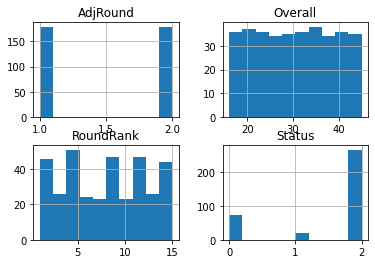

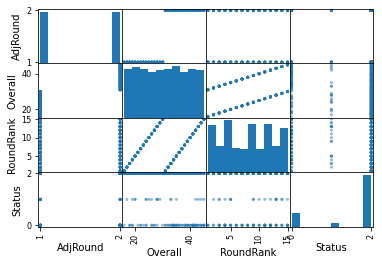

In [107]:
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

# histograms to see the distributon of our input variables
data[["AdjRound", "Overall", "RoundRank", "Status"]].hist()
pyplot.show()

# scatter plot matrix for observing relationships between input features
scatter_matrix(data[["AdjRound", "Overall", "RoundRank", "Status"]])
pyplot.show()

#### As expected, because our data is very orderly, meaning that other than our removed goaltenders, there's the same amount of players chosen at each pick and each round, we do not see anything that stands out within our input variables
#### Most of the input variables are based off each other as well, which is why we see a lot of linear lines in our scatter matrix

#### So we'll go ahead and use some common algorithms

#### For our Data, Classification models will fit the best

In [108]:
# Import more libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

#### What we will do now is apply a Stratified k-fold Cross Validation with 10 folds (k = 10) to estimate the accuracy of our model.
#### What this is is it will split the training data into k=10 subsets called folds. Then, it will test our model 10 times, with each of the subsets taking turns being the "test" fold, while the other 9 folds are used for training our model.
#### The mean, and standard deviation of the 10 results will then be calculated, with the mean being the accuracy estimate of our model as a percentage, and the standard deviation representing how much variance there could be in our accuracy

### We will start by training our model to predict a player's "Level"

In [109]:
# Model to Run (Name, Model)
models_clas = []
models_clas.append(("GNB", GaussianNB()))
models_clas.append(("KNN", KNeighborsClassifier(n_neighbors=19))) # n_neighbors = sqrt(total rows=357)
models_clas.append(("LDA", LinearDiscriminantAnalysis()))
models_clas.append(("CART", DecisionTreeClassifier()))
models_clas.append(("LINSVC", LinearSVC(random_state=0, tol=1e-5)))
models_clas.append(("SVC", SVC()))
models_clas.append(("BAG", BaggingClassifier(KNeighborsClassifier(n_neighbors=19), max_samples=0.5, max_features=0.5)))

# Estimate and print the accuracy of each model
kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

print("\n\nK-Fold: ")
for name, model in models_clas:
    cv_results = cross_val_score(model, X_train, y_lvl_train, cv=kfold, scoring="accuracy") # Notice y_lvl_train
    print("Model: %s -->  Mean Accuracy: %f | Std Deviation: (%f)" % (name, cv_results.mean(), cv_results.std()))



K-Fold: 
Model: GNB -->  Mean Accuracy: 0.638547 | Std Deviation: (0.038198)
Model: KNN -->  Mean Accuracy: 0.610714 | Std Deviation: (0.020262)
Model: LDA -->  Mean Accuracy: 0.648892 | Std Deviation: (0.025018)
Model: CART -->  Mean Accuracy: 0.568719 | Std Deviation: (0.050985)
Model: LINSVC -->  Mean Accuracy: 0.627956 | Std Deviation: (0.018394)
Model: SVC -->  Mean Accuracy: 0.634852 | Std Deviation: (0.025811)
Model: BAG -->  Mean Accuracy: 0.606773 | Std Deviation: (0.036975)


### Now what we want to do is look at our models' precision and recall. What this will do is make sure our models are not decieving us.
#### For example, in an analysis or predicting which E-mails are spam and which ones are real, if 95% of the E-mails are real and 5% of the E-mails are spam, a model that predicts an E-mail is real 100% of the time will have an accuracy of 95%, even though it missed every single one of the spam E-mails.

#### What checking precision and recall does it analyze the True Positives, True Negatives, False Positives, and False Negatives of our data 

#### Because our data is not a binary dataset, this will be less of an effect on us, but we will check nonetheless
#### We will also used F1 Score which combines the two scores using this equation: F1 = 2 * (precision * recall) / (precision + recall)

In [110]:
# Set up Test Set
X_test_minmax = min_max_scaler.transform(X_test)
X_test = pd.DataFrame(X_test_minmax, columns = X_test.columns)

# Import Tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [111]:
# On Level:
print("\nLevel Precision & Recall: ")
for name, model in models_clas:
    model.fit(X_train, y_lvl_train)
    y_pred = model.predict(X_test)
    print("Model: %s -->  Precision: %f | Recall: %f | F1: %f" % (name, precision_score(y_lvl_test, y_pred, average="weighted"), recall_score(y_lvl_test, y_pred, average="weighted"), f1_score(y_lvl_test, y_pred, average="weighted")))


Level Precision & Recall: 
Model: GNB -->  Precision: 0.373166 | Recall: 0.555556 | F1: 0.430014
Model: KNN -->  Precision: 0.393785 | Recall: 0.541667 | F1: 0.430062
Model: LDA -->  Precision: 0.373166 | Recall: 0.555556 | F1: 0.430014
Model: CART -->  Precision: 0.553519 | Recall: 0.597222 | F1: 0.508847
Model: LINSVC -->  Precision: 0.375000 | Recall: 0.555556 | F1: 0.429335
Model: SVC -->  Precision: 0.475017 | Recall: 0.569444 | F1: 0.456304
Model: BAG -->  Precision: 0.338170 | Recall: 0.541667 | F1: 0.401613


### We see that the highest F1 Score and Recall is given by CART. The second highest for F1 Score and Recall was given bySVC. And finally we will also take a further look at KNN which had the third highest F1 Score and had a good accuracy score as well. It is also a model we can try hyperparametric tuning to give us better results

In [112]:
print("CART:")
cartmodel = DecisionTreeClassifier()
cartmodel.fit(X_train, y_lvl_train)
cart_pred = bagmodel.predict(X_test)
display(cart_pred)
print(accuracy_score(y_lvl_test, cart_pred))
print(classification_report(y_lvl_test, cart_pred))

CART:


array([1, 1, 0, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 4, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 5, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1], dtype=int64)

0.5694444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.45      1.00      0.62        24
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         9
           4       1.00      0.14      0.25         7
           5       0.33      0.25      0.29         4

    accuracy                           0.57        72
   macro avg       0.46      0.40      0.36        72
weighted avg       0.48      0.57      0.46        72



In [113]:
print("SVC:")
svcmodel = SVC()
svcmodel.fit(X_train, y_lvl_train)
svc_pred = bagmodel.predict(X_test)
display(svc_pred)
print(accuracy_score(y_lvl_test, svc_pred))
print(classification_report(y_lvl_test, svc_pred))

SVC:


array([1, 1, 0, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 4, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 5, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1], dtype=int64)

0.5694444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.45      1.00      0.62        24
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         9
           4       1.00      0.14      0.25         7
           5       0.33      0.25      0.29         4

    accuracy                           0.57        72
   macro avg       0.46      0.40      0.36        72
weighted avg       0.48      0.57      0.46        72



In [114]:
print("KNN:")
knnmodel = KNeighborsClassifier(n_neighbors=19)
knnmodel.fit(X_train, y_lvl_train)
knn_pred = knnmodel.predict(X_test)
display(knn_pred)
print(accuracy_score(y_lvl_test, knn_pred))
print(classification_report(y_lvl_test, knn_pred))

KNN:


array([1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 0, 1], dtype=int64)

0.5416666666666666
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.46      0.96      0.62        24
           2       0.25      0.08      0.12        13
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         4

    accuracy                           0.54        72
   macro avg       0.27      0.34      0.28        72
weighted avg       0.39      0.54      0.43        72



## Now let's try Hyperparametric Tuning on our KNN Model to see if that gives us the best model

In [118]:
from sklearn.model_selection import GridSearchCV
n_neighbors = list(range(1,40)) # 20 on either side of the 19 we started with

# Convert to dict
hyperparams = dict(n_neighbors=n_neighbors)

# New KNNhp Model (KNN HyperParameter)
knnhp = KNeighborsClassifier()

# GridSearch
gs = GridSearchCV(knnhp, hyperparams, cv=10)
newknnmodel = gs.fit(X_train, y_lvl_train)
print('Best n_neighbors value:', newknnmodel.best_estimator_.get_params()['n_neighbors'])


Best n_neighbors value: 17


#### We'll try using our best n_neighbors value and see if that helps

In [119]:
print("KNN (With Hyperparametric Tuning):")
knnmodel = KNeighborsClassifier(n_neighbors=17)
knnmodel.fit(X_train, y_lvl_train)
knn_pred = knnmodel.predict(X_test)
display(knn_pred)
print(accuracy_score(y_lvl_test, knn_pred))
print(classification_report(y_lvl_test, knn_pred))

KNN (With Hyperparametric Tuning):


array([1, 1, 0, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 3, 0, 4, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 0, 1], dtype=int64)

0.5833333333333334
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.50      0.96      0.66        24
           2       0.25      0.08      0.12        13
           3       0.33      0.11      0.17         9
           4       1.00      0.14      0.25         7
           5       0.50      0.25      0.33         4

    accuracy                           0.58        72
   macro avg       0.59      0.42      0.42        72
weighted avg       0.57      0.58      0.51        72



### We see that our hyperparametric tuning worked and our new and improved KNN model provides the best average accuracy at just under 60%